In [2]:
import numpy as np
from matplotlib.pyplot import *
import random
import math
from statistics import mode

In [3]:
class Circuit:
    
    def __init__(self, i=4, c=4):
        self.i = i
        self.c = c
     
    
    def interval_i(self, time, interval = [30, 90]):
        start, end = interval
        if start < time and time < end:
            return self.i
        return 0
    
    
    def linear_i(self, time):
        return self.c * time
    
    
    def sine_cosine_i(self, time):
        if self.c % 2 == 0:
            return self.c * math.sin(time)
        else :
            return self.c * math.cos(time)
    
    
    def constant_i(self, time):
        return self.c
    
    
    def step_i(self, time, int1=[0, 40], int2=[50, 90]):
        begin1, end1 = int1
        begin2, end2 = int2
        if begin1 < time < end1 or begin2 < time < end2:
            return self.i
        return 0

In [4]:
class ALIF:
    circuit = Circuit()
    def __init__(self, time_interval=100, steps=0.1, i_function=circuit.interval_i, R=1, C=1, u_rest=0, threshold=1, cons_w=1, a=1, b=1):
        self.time_interval = time_interval
        self.steps = steps
        self.i_function = i_function
        self.u_rest = u_rest
        self.u = []
        self.R = R
        self.C = C
        self.a = a
        self.b = b
        self.threshold = threshold
        self.i_init = []
        self.timer = []
        self.cons_w = cons_w
        
        self.spike = False
        
        
    def run(self):
        self.timer = np.arange(0, self.time_interval + self.steps, self.steps)
        u = [self.u_rest for i in range(len(self.timer))]
        self.i_init = [self.i_function(j) for j in self.timer]
        w = [0 for _ in range(len(self.timer))]
        
        cons = self.R * self.C
        
        for k in range(len(self.timer)):
            self.spike = False
            u[k] = u[k-1] + (-(u[k-1] - self.u_rest) + self.R * self.i_init[k] - self.R * w[k-1]) * (self.steps/cons)
            
            if u[k] >= self.threshold :
                u[k] = self.u_rest
                self.spike = True
                
            if self.spike:
                w[k] = w[k-1] + (self.a * (u[k-1] - self.u_rest) - w[k-1] + self.b * self.cons_w * 1) * (self.steps/self.cons_w)
            else :
                w[k] = w[k-1] + (self.a * (u[k-1] - self.u_rest) - w[k-1]) * (self.steps/self.cons_w)
                
        self.u = u
        
        
    def time_period(self, i_cons=0):
        time_periods = []
        cons = self.R * self.C
        
        u = [self.u_rest for i in range(len(self.timer))]
        w = [0 for _ in range(len(self.timer))]
        
        cirr = Circuit(c=i_cons)
        i_cons = cirr.constant_i(self.time_interval)
        previous_period = 0
        
        for k in range(len(self.timer)):
            self.spike = False
            u[k] = u[k-1] + (-(u[k-1] - self.u_rest) + self.R * i_cons - self.R * w[k-1]) * (self.steps/cons)
            
            if u[k] >= self.threshold:
                u[k] = self.u_rest
                
                time_periods.append(self.timer[k] - previous_period)
                previous_period = self.timer[k] 
                self.spike = True
                
            if self.spike:
                w[k] = w[k-1] + (self.a * (u[k-1] - self.u_rest) - w[k-1] + self.b * self.cons_w * 1) * (self.steps/self.cons_w)
            else :
                w[k] = w[k-1] + (self.a * (u[k-1] - self.u_rest) - w[k-1]) * (self.steps/self.cons_w)
                
        return mode(time_periods)     

In [5]:
class Plot:
    def __init__(self, alif):
        self.alif = alif
       
    
    def ut_plot(self):
        my_figure = figure(num=None, figsize=(20, 10))
        subplot(221)
        plot(alif.timer, alif.u)
        title('u - time')
        xlabel('time')
        ylabel('u')
        grid(True)
       
    
    def it_plot(self):
        my_figure = figure(num=None, figsize=(20, 10))
        subplot(221)
        plot(alif.timer, alif.i_init)
        title('i - time')
        xlabel('time')
        ylabel('i')
        grid(True)
     
    
    def fi_plot(self):
        my_figure = figure(num=None, figsize=(20, 10)) 
        i_x = np.arange(0, max(alif.i_init), alif.steps)
        i_y = [0 for _ in range(len(i_x))]

        for j in range(len(i_x)):
            try:
                i_y[j] = 1 / (alif.time_period(i_cons=i_x[j]))
            except:
                i_y[j] = 0  
                
        subplot(221)
        plot(i_x, i_y)
        title('F - I')
        xlabel('I')
        ylabel('F')
        grid(True) 
       
    
    def plotting(self):
        self.ut_plot()
        self.it_plot()
        self.fi_plot()

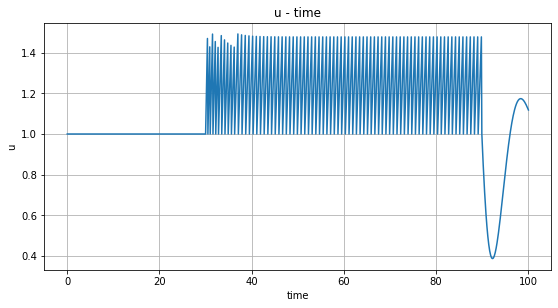

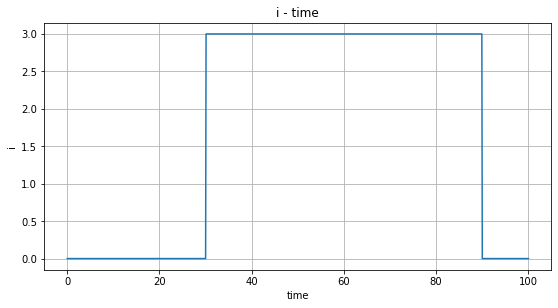

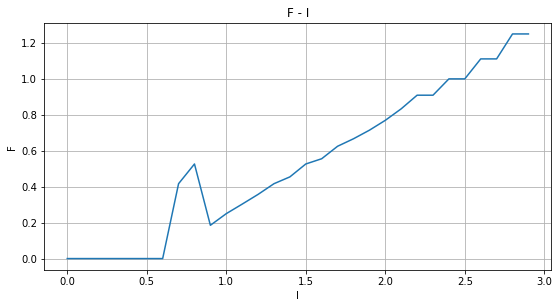

In [6]:
circuit = Circuit(i=3)
alif = ALIF(i_function=circuit.interval_i, u_rest=1, R=4, C=2.5, threshold=1.5, cons_w=3, a=2, b=2)
alif.run()
plott = Plot(alif)
plott.plotting()

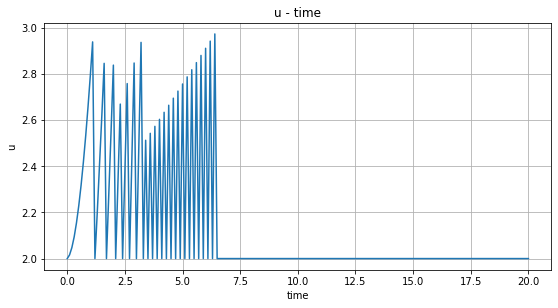

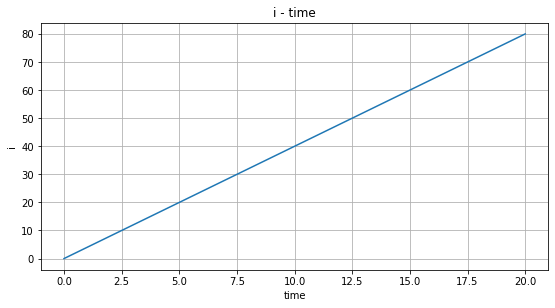

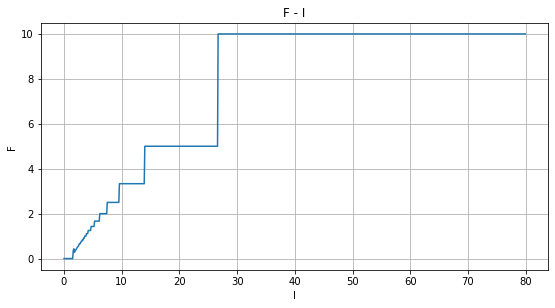

In [7]:
circuit = Circuit(i=7)
alif = ALIF(time_interval=20, i_function=circuit.linear_i, u_rest=2, R=1.25, C=2.5, threshold=3, cons_w=2, a=1, b=1)
alif.run()
plott = Plot(alif)
plott.plotting()

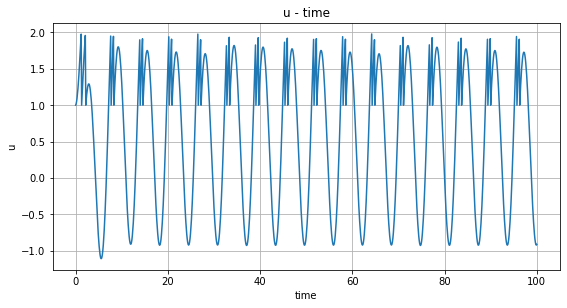

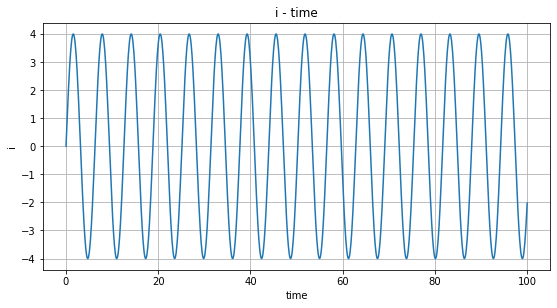

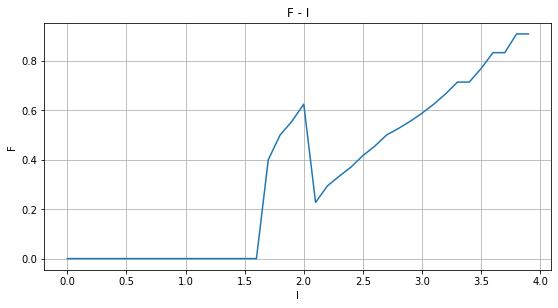

In [8]:
circuit = Circuit(i=2, c=4)
alif = ALIF(i_function=circuit.sine_cosine_i, u_rest=1, R=2, C=2.5, threshold=2, cons_w=2, a=2, b=2)
alif.run()
plott = Plot(alif)
plott.plotting()

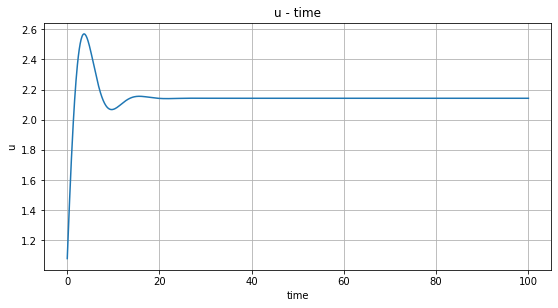

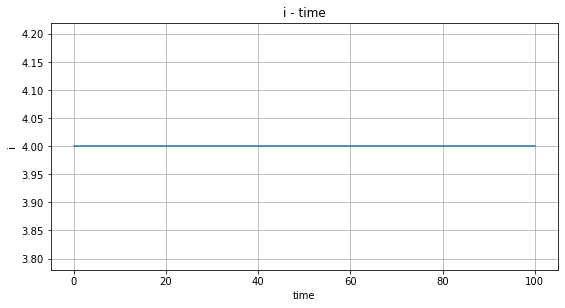

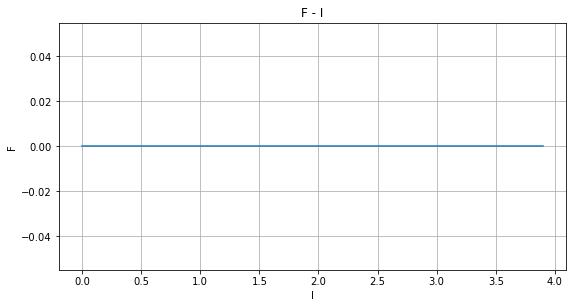

In [9]:
circuit = Circuit(i=2)
alif = ALIF(i_function=circuit.constant_i, u_rest=1, R=2, C=5, threshold=4, cons_w=2, a=3, b=1)
alif.run()
plott = Plot(alif)
plott.plotting()

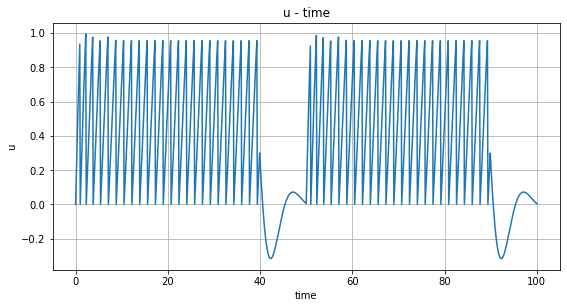

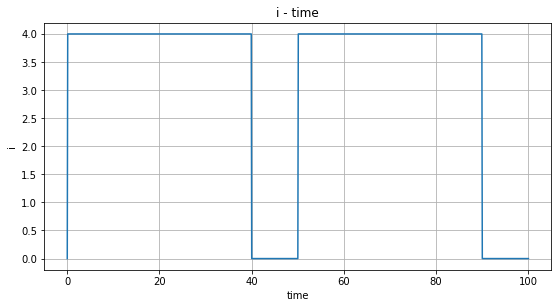

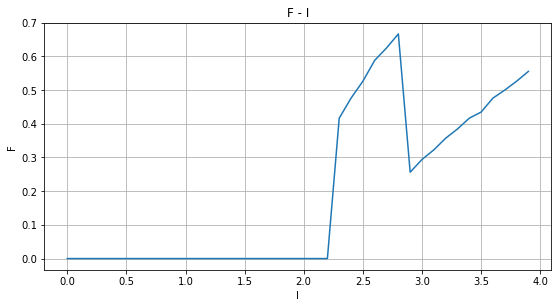

In [11]:
circuit = Circuit(i=4)
alif = ALIF(i_function=circuit.step_i, u_rest=0, R=2, C=3.5, threshold=1, cons_w=2, a=3, b=2)
alif.run()
plott = Plot(alif)
plott.plotting()